In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    #H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[1]], [z[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.00000000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(random.uniform(-5., 5.))

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.))
    x.append(random.uniform(-5., 5.))
    
    u = [[0, resultado[1][0]],[resultado[1][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.8000461912428826-0.006763918182287251j)], [(0.5995489412242515-0.0205282327016075j)]]
iteracao:  2
[[(0.8007126389219634+0.0008341477396339213j)], [(0.5986506697980225-0.02181626875441791j)]]
iteracao:  3
[[(0.8008697786557721-0.007929078982447647j)], [(0.5971014026812017-0.04488476566289157j)]]
iteracao:  4
[[(0.797213169805114-0.04582406855991697j)], [(0.5923768003234255-0.1069627993066547j)]]
iteracao:  5
[[(0.7954190420623992-0.06280881957176866j)], [(0.5861256824094031-0.14078452111409445j)]]
iteracao:  6
[[(0.7904846562697415-0.08857965536344843j)], [(0.5766824872605073-0.18634634022695634j)]]
iteracao:  7
[[(0.7923031763851844-0.09142886340160795j)], [(0.5690803163007138-0.20011004466050553j)]]
iteracao:  8
[[(0.7915476050200475-0.10183938010386431j)], [(0.5594364978952437-0.223856943549955j)]]
iteracao:  9
[[(0.7817928197931804-0.1317241714590874j)], [(0.5439724706123132-0.2748502800339819j)]]
iteracao:  10
[[(0.7710886995602397-0.15901692690283992j)], [(0.525

[[(0.19073382306012837-0.7612319976294136j)], [(-0.4630354366100244+0.41200071251000675j)]]
iteracao:  81
[[(0.17545554664827961-0.7675855796180625j)], [(-0.43717761792158344+0.4346301962949548j)]]
iteracao:  82
[[(0.1698958915658596-0.7639917256238737j)], [(-0.4274419793217399+0.4524879352102276j)]]
iteracao:  83
[[(0.17318976737279196-0.7524905708444025j)], [(-0.430851522685633+0.4670440648969903j)]]
iteracao:  84
[[(0.14071555146392833-0.7721758906567476j)], [(-0.3756754398344878+0.49275900476012474j)]]
iteracao:  85
[[(0.11032697372748984-0.7867543930393998j)], [(-0.3238569967659678+0.5137723946186821j)]]
iteracao:  86
[[(0.11734911513430815-0.7764193009923728j)], [(-0.32842780255345255+0.5249165424864408j)]]
iteracao:  87
[[(0.11606683687572505-0.7716231835912953j)], [(-0.3192281772334791+0.5377912853403224j)]]
iteracao:  88
[[(0.11412618220786894-0.7675815839927953j)], [(-0.30793798283294255+0.550425171071415j)]]
iteracao:  89
[[(0.0819754704716382-0.7791751853363545j)], [(-0.253

[[(-0.5869895191200042-0.42248667164488013j)], [(0.25646382123351846-0.641228922015586j)]]
iteracao:  159
[[(-0.6072801444499442-0.4181672896877383j)], [(0.217293081774168-0.6396331492380932j)]]
iteracao:  160
[[(-0.5815328712918411-0.3984884349280121j)], [(0.20614001501810897-0.6786255848839796j)]]
iteracao:  161
[[(-0.6050195312372317-0.3938986484619929j)], [(0.16417667522010782-0.6721913000190082j)]]
iteracao:  162
[[(-0.5767822755177194-0.37678688432703306j)], [(0.15074989370272898-0.7089627785464068j)]]
iteracao:  163
[[(-0.5939696774917216-0.3696892223179605j)], [(0.11143322733650718-0.7057708113240412j)]]
iteracao:  164
[[(-0.5827216722285816-0.35809881144040273j)], [(0.0863593932320546-0.7243912272319024j)]]
iteracao:  165
[[(-0.585241293939415-0.3486338169093658j)], [(0.053554589082410044-0.7301225215095953j)]]
iteracao:  166
[[(-0.5898584307356303-0.33936514949554425j)], [(0.019456530795630873-0.7324750310964347j)]]
iteracao:  167
[[(-0.5934852084435108-0.33006530704977866j)]

[[(-0.5130459004977026+0.4177215433618877j)], [(0.13946539199900496+0.7367780359294427j)]]
iteracao:  236
[[(-0.4849574420159821+0.42082807974796727j)], [(0.1865365299786546+0.7435885842183518j)]]
iteracao:  237
[[(-0.5071400240246672+0.4363683005435917j)], [(0.20391466966462124+0.7147099844905006j)]]
iteracao:  238
[[(-0.5271829680685806+0.4526796655271057j)], [(0.21973258172358895+0.6847457064894322j)]]
iteracao:  239
[[(-0.5196276574373736+0.46076919771344027j)], [(0.2520074809291049+0.6739220466571009j)]]
iteracao:  240
[[(-0.5289179566365828+0.4755958106250258j)], [(0.2713852968490753+0.6483859127171221j)]]
iteracao:  241
[[(-0.5477586943753525+0.49564855121022167j)], [(0.28072748287032695+0.6127681918457156j)]]
iteracao:  242
[[(-0.5256709682683217+0.49705412069564237j)], [(0.3211629812182616+0.6111149020443152j)]]
iteracao:  243
[[(-0.5182044904553426+0.5054794187501355j)], [(0.3492470024882639+0.594963061256227j)]]
iteracao:  244
[[(-0.49477410067738153+0.5037683689864677j)], [

[[(0.1335114855241303+0.6281222203458715j)], [(-0.48970362825473496-0.5897688696747546j)]]
iteracao:  316
[[(0.16088130783037047+0.6100894626982806j)], [(-0.535809942316258-0.5610842722642428j)]]
iteracao:  317
[[(0.18549558836588584+0.591878109307694j)], [(-0.5782392898508324-0.5300102035204691j)]]
iteracao:  318
[[(0.17568067572558924+0.6105148140033j)], [(-0.5804557200787529-0.5093907346378834j)]]
iteracao:  319
[[(0.206430938520763+0.5811612456797831j)], [(-0.6295555678521855-0.47254360620244906j)]]
iteracao:  320
[[(0.22573016881837105+0.5631062246497174j)], [(-0.6639645346383634-0.437159199259049j)]]
iteracao:  321
[[(0.23592190973377117+0.5572480163863615j)], [(-0.6856545947574346-0.40459000905174153j)]]
iteracao:  322
[[(0.2453903299683397+0.552113996183001j)], [(-0.7050204908708498-0.3713483896819967j)]]
iteracao:  323
[[(0.26793556021927284+0.5187734484415397j)], [(-0.7431501412505308-0.32682152318679963j)]]
iteracao:  324
[[(0.2657610364276211+0.53937243289949j)], [(-0.74025

[[(0.6762789721219418+0.022925887140778835j)], [(0.7060768276328145+0.20874963218564171j)]]
iteracao:  394
[[(0.6676855123891666+0.04366956761634293j)], [(0.7143605117562212+0.20488490514505384j)]]
iteracao:  395
[[(0.6620349975712752+0.05648778612777774j)], [(0.7221065506136471+0.19256339517581375j)]]
iteracao:  396
[[(0.6587862204670264+0.06270815355750395j)], [(0.7293702492759487+0.1734565714681745j)]]
iteracao:  397
[[(0.6657132723266219+0.01973441985533602j)], [(0.7378700094114758+0.10947135358491239j)]]
iteracao:  398
[[(0.6616270607739321+0.04106741142750309j)], [(0.7415756679857346+0.10309396190545468j)]]
iteracao:  399
[[(0.6581323677866681+0.06276990483883195j)], [(0.7440406527679738+0.09656587668855264j)]]
iteracao:  400
[[(0.6584883630382533+0.05784768835279492j)], [(0.7474382584878767+0.06620050130576138j)]]
iteracao:  401
[[(0.6601867564323072+0.028469221219902783j)], [(0.7504281203665115+0.014153496582607776j)]]
iteracao:  402
[[(0.6597103621603237-0.010577538376451496j)

[[(0.3753835833130945-0.5575831277624083j)], [(-0.7393542701585774+0.03928337151341805j)]]
iteracao:  472
[[(0.36446912673449994-0.5860039745142667j)], [(-0.7186901270084121+0.0851222473733492j)]]
iteracao:  473
[[(0.35430229872446056-0.597651561803768j)], [(-0.7088372687878808+0.12178635466950377j)]]
iteracao:  474
[[(0.35073587440406623-0.5723586755253063j)], [(-0.7277660059440786+0.14052128299551828j)]]
iteracao:  475
[[(0.33695351019337566-0.5979952683035679j)], [(-0.7035732774065351+0.18397915924962915j)]]
iteracao:  476
[[(0.3338771787428303-0.5808377246284094j)], [(-0.7130275212276844+0.20674868210221248j)]]
iteracao:  477
[[(0.3165471578678312-0.6102335114853998j)], [(-0.6814971037504483+0.2509469086542494j)]]
iteracao:  478
[[(0.3091318461882422-0.6096221247942782j)], [(-0.673949421351199+0.2803395068523103j)]]
iteracao:  479
[[(0.3020960741641558-0.6086691850055432j)], [(-0.6652883280762765+0.3092748303106221j)]]
iteracao:  480
[[(0.2871100182805358-0.6238817293350734j)], [(-

[[(-0.4978998198354794-0.5218121828059075j)], [(0.5311447555808126-0.4446264849520603j)]]
iteracao:  550
[[(-0.4830705764431677-0.4882588639653003j)], [(0.5335410869934805-0.49353789455411684j)]]
iteracao:  551
[[(-0.4932215937929908-0.4831910836609217j)], [(0.5073318350902095-0.5156286357837617j)]]
iteracao:  552
[[(-0.4906258952602268-0.46602960499313684j)], [(0.49122056638689676-0.5484565962385057j)]]
iteracao:  553
[[(-0.5015614555815952-0.4613549390653283j)], [(0.4618832160256491-0.567671794050075j)]]
iteracao:  554
[[(-0.5030907096530688-0.4491036406282608j)], [(0.43891902288207557-0.5937637523535179j)]]
iteracao:  555
[[(-0.4936639735744998-0.4297602553999909j)], [(0.421890951771487-0.6273831946353109j)]]
iteracao:  556
[[(-0.4734047169028846-0.40494990626249594j)], [(0.40867227396573846-0.6670008716066006j)]]
iteracao:  557
[[(-0.5110988080746135-0.41523795204903424j)], [(0.35805629135896894-0.6619295915744866j)]]
iteracao:  558
[[(-0.5238266420023405-0.41029308340689136j)], [(

[[(-0.5706662684428764+0.3768842865998505j)], [(-0.14360729777567133+0.7153144722379132j)]]
iteracao:  627
[[(-0.587920621854631+0.3816296474111921j)], [(-0.12260325635867358+0.7026209514902787j)]]
iteracao:  628
[[(-0.6006204037330141+0.38797392918113444j)], [(-0.10008075502557531+0.691892194291677j)]]
iteracao:  629
[[(-0.5893964109029569+0.3979176700351183j)], [(-0.06442468122363199+0.7000874689452147j)]]
iteracao:  630
[[(-0.6134776596110145+0.40485268939339325j)], [(-0.049704716289055983+0.6762163164447863j)]]
iteracao:  631
[[(-0.6149514972553319+0.41407609846658133j)], [(-0.022768639770996125+0.670713675180021j)]]
iteracao:  632
[[(-0.5924973128333914+0.42360597246952253j)], [(0.018990980425310316+0.6849407718330288j)]]
iteracao:  633
[[(-0.5545101956643005+0.43060244507712647j)], [(0.07101331226798084+0.7085595867891437j)]]
iteracao:  634
[[(-0.5460673906083349+0.4390454929208205j)], [(0.10533279092797648+0.7056586033506814j)]]
iteracao:  635
[[(-0.5360954795703796+0.4470191727

[[(-0.00036796347595716844+0.5166717452622684j)], [(-0.14263636395582702-0.8442183301298111j)]]
iteracao:  704
[[(-0.0038809718792122755+0.5189065715661452j)], [(-0.17507529481546852-0.8367013195141173j)]]
iteracao:  705
[[(-0.02257121706927992+0.525134214963097j)], [(-0.1974301827339195-0.8274934851684518j)]]
iteracao:  706
[[(-0.03741104213466638+0.5314988959251133j)], [(-0.22131452405316857-0.8167795096597313j)]]
iteracao:  707
[[(-0.04891689294400492+0.5379193846544106j)], [(-0.24640162942143778-0.8046960037428742j)]]
iteracao:  708
[[(-0.05670656676750761+0.5440497363141644j)], [(-0.272975941218568-0.791377238299834j)]]
iteracao:  709
[[(-0.03198203961520563+0.538607141181091j)], [(-0.32115758529610233-0.7782909800503242j)]]
iteracao:  710
[[(0.008899967632384417+0.5239847749127631j)], [(-0.37991272048695757-0.7622510190266745j)]]
iteracao:  711
[[(0.03858628270503278+0.5120112179925234j)], [(-0.4302139946998791-0.7424763122396901j)]]
iteracao:  712
[[(0.06677056587287397+0.498598

[[(0.7431224221954278+0.29244590520175046j)], [(0.4089276401452209+0.4416131074019419j)]]
iteracao:  782
[[(0.7642981697643629+0.263470798961434j)], [(0.4397786711622366+0.39118494023013195j)]]
iteracao:  783
[[(0.7578591167391537+0.2635648909711627j)], [(0.4510787616995432+0.39078197170876944j)]]
iteracao:  784
[[(0.7755031976490332+0.23406293997448907j)], [(0.47765789182917245+0.3400761069443319j)]]
iteracao:  785
[[(0.787175152507682+0.2092394660634429j)], [(0.4983715045428978+0.2969839348266594j)]]
iteracao:  786
[[(0.7992042005984265+0.18001642837058757j)], [(0.5176112743195382+0.2468699815335461j)]]
iteracao:  787
[[(0.7916127687080171+0.18921912332559046j)], [(0.5217451964164277+0.2555910514783328j)]]
iteracao:  788
[[(0.7986023774211561+0.16734333846267013j)], [(0.5360359136586912+0.21655354216386605j)]]
iteracao:  789
[[(0.8067825742968574+0.13836324387785467j)], [(0.5496791692307258+0.1667626698852564j)]]
iteracao:  790
[[(0.8144652659319006+0.10204017209299557j)], [(0.561216

[[(0.42724242233158805-0.631395150602498j)], [(-0.6454682927618139-0.04662830030429299j)]]
iteracao:  860
[[(0.4177925340397505-0.6536187782079754j)], [(-0.631025018800009-0.006225389004057391j)]]
iteracao:  861
[[(0.40730703276929286-0.666775730835222j)], [(-0.6234914286803424+0.0277305356175178j)]]
iteracao:  862
[[(0.3975070200217915-0.6627915482123717j)], [(-0.6325516292790135+0.050728761926153575j)]]
iteracao:  863
[[(0.3899738835382511-0.6381959080705643j)], [(-0.6608496082479326+0.062478683457883655j)]]
iteracao:  864
[[(0.3827132927222106-0.6195424571176346j)], [(-0.6806757166560424+0.07986041140399276j)]]
iteracao:  865
[[(0.36856377798497636-0.652253981652317j)], [(-0.6501972151326026+0.1263665370890104j)]]
iteracao:  866
[[(0.3596060335514599-0.6520020202979399j)], [(-0.6495899245755555+0.15365295726952302j)]]
iteracao:  867
[[(0.35032982239608734-0.6537984335831163j)], [(-0.6454882768436402+0.18210146460350485j)]]
iteracao:  868
[[(0.3469937808448659-0.6360835534434709j)], 

[[(-0.4243648010937435-0.5254681783639106j)], [(0.6543784972539324-0.33997922883244297j)]]
iteracao:  938
[[(-0.4240667277504512-0.5036357815993487j)], [(0.6493679841591931-0.38057721328277444j)]]
iteracao:  939
[[(-0.43884051736976554-0.50793609694317j)], [(0.6220861811067437-0.40302368298052255j)]]
iteracao:  940
[[(-0.4650887313125126-0.5275604289353373j)], [(0.5798610837039335-0.41125779261665807j)]]
iteracao:  941
[[(-0.4780028754160615-0.5263814822240102j)], [(0.554180542282546-0.43280376068757187j)]]
iteracao:  942
[[(-0.5001506799297263-0.53558271340632j)], [(0.5168011635145568-0.44262443870176804j)]]
iteracao:  943
[[(-0.5200019139444563-0.5402776508041054j)], [(0.4819974900239661-0.45318414655094763j)]]
iteracao:  944
[[(-0.5118742205192798-0.5155177704211187j)], [(0.4779905791601416-0.49371104683968225j)]]
iteracao:  945
[[(-0.5204535599775579-0.5079095112804101j)], [(0.4536672935325752-0.5151129854251539j)]]
iteracao:  946
[[(-0.5312840044466517-0.5020815601535821j)], [(0.4

In [6]:
len(Resp[0])

1000

/home/gabriel/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


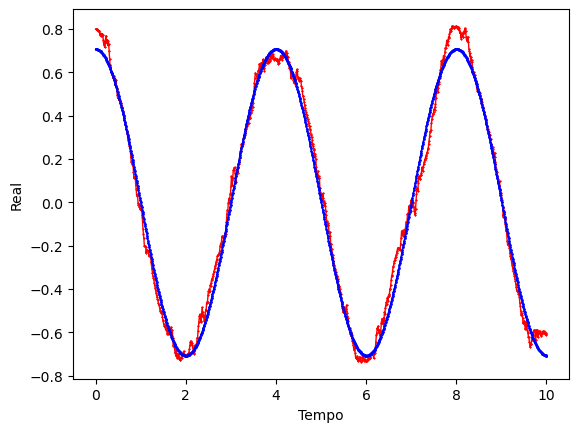

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()

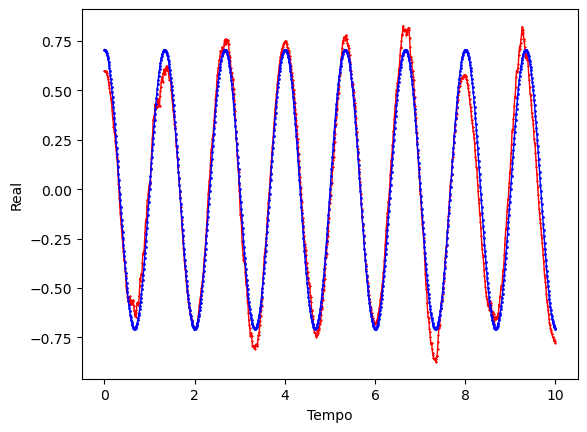

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()